#### Figure S15 A,B in M&S (2020) AS&T

This figure indicates the count-based size distrinion of test dust samples and the recovered dust for filter type 3 of the experiments.

The code creates 8 figures two of which are illustrated in the paper (the remaining six are more or less similar to those two illustrated).

Plot type: Line plot.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_c_psd_master.xlsx')
master_list = list(df.columns)

df_td_col_list = [col for col in list(df.columns) if ('_td_' in col) & (('mean' in col) | ('max' in col)  | ('min' in col))]
df_td = df[['Size'] + df_td_col_list]

filter_type = {'08m': 'MERV 8',
               '08e': 'MERV 8E',
               '11e': 'MERV 11',
               '14e': 'MERV 14'}

ash_up = 30
iso_up = 30

df_iso_min = df['Eval_010_iso2_11e_td_180326_am_mean'] - df['Eval_010_iso2_11e_td_180326_am_min']
df_iso_max = df['Eval_010_iso2_11e_td_180326_am_max'] - df['Eval_010_iso2_11e_td_180326_am_mean']

df_ash_min = df['Eval_001_ash2_11e_td_171128_am_mean'] - df['Eval_001_ash2_11e_td_171128_am_min']
df_ash_max = df['Eval_001_ash2_11e_td_171128_am_max'] - df['Eval_001_ash2_11e_td_171128_am_mean']


In [5]:
df.iloc[12:,:].head() # data from the 12th index show to indicate where psd starts to rise

,Size,Eval_021_ash2_08m_fg_180406_am_count,Eval_021_ash2_08m_hd_180406_am_count,Eval_021_ash2_08m_sc_180406_am_count,Eval_021_ash2_08m_sd_180406_am_count,Eval_021_ash2_08m_fg_180406_am_mean,Eval_021_ash2_08m_hd_180406_am_mean,Eval_021_ash2_08m_sc_180406_am_mean,Eval_021_ash2_08m_sd_180406_am_mean,Eval_021_ash2_08m_fg_180406_am_median,...,Eval_001_ash2_11e_hd_171128_am_mean,Eval_001_ash2_11e_td_171128_am_mean,Eval_001_ash2_11e_hd_171128_am_median,Eval_001_ash2_11e_td_171128_am_median,Eval_001_ash2_11e_hd_171128_am_min,Eval_001_ash2_11e_td_171128_am_min,Eval_001_ash2_11e_hd_171128_am_max,Eval_001_ash2_11e_td_171128_am_max,Eval_001_ash2_11e_hd_171128_am_std,Eval_001_ash2_11e_td_171128_am_std
12,0.398,5,5,5,5,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
13,0.447,5,5,5,5,0.064,0.008,0.050,0.032,0.06,...,0.050,0.050,0.05,0.05,0.05,0.05,0.05,0.05,0.000000,0.000000
14,0.501,5,5,5,5,3.724,0.530,2.872,1.942,3.72,...,3.128,3.100,3.13,3.10,3.12,3.05,3.14,3.14,0.008367,0.033912
15,0.562,5,5,5,5,9.706,6.104,8.132,7.062,9.70,...,8.498,8.434,8.50,8.44,8.48,8.35,8.52,8.50,0.014832,0.055498
16,0.631,5,5,5,5,14.446,12.742,12.862,12.394,14.44,...,13.078,13.002,13.08,13.00,13.07,12.93,13.09,13.06,0.008367,0.048683


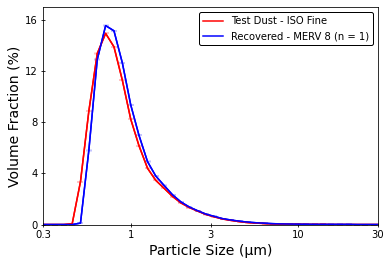

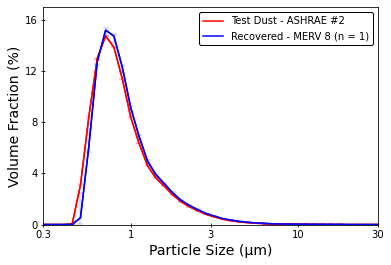

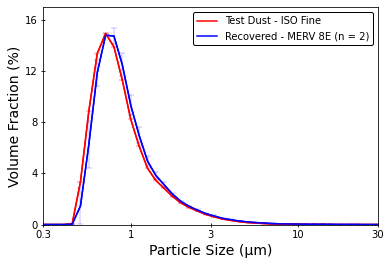

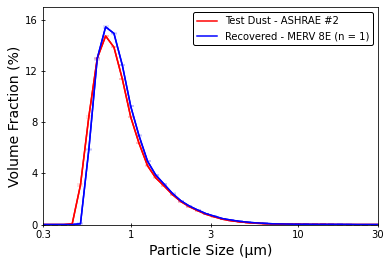

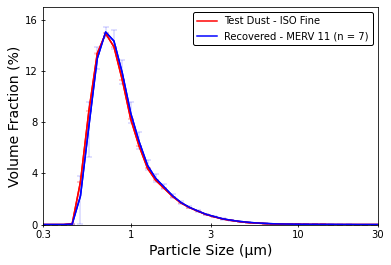

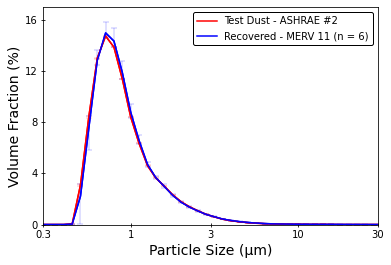

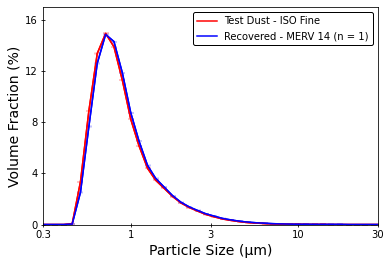

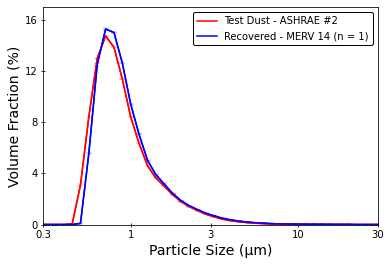

In [7]:
### Due to the similarity of the figures relative to iso and ashrae and filter type cases, 
### two for loops inside each other are desined for automation.

for f in ['08m','08e','11e','14e']:
    for t in ['iso','ash']:
        for stat in ['min', 'max', 'mean']:
            locals()['psd_%s' %stat] = [col for col in list(df.columns) if (f in col) & (t in col) & (stat in col) & ('_hd_' in col) & ('_td_' not in col) & ('_r2' not in col) & ('iso1' not in col)]
        
        counter = len(psd_min)
        
        if counter == 1:
            df_mean = df[psd_mean[0]]
            df_min = df_mean - df[psd_min[0]]
            df_max = df[psd_max[0]] - df_mean
        else:
            df_min = df[psd_min].min(axis=1)
            df_mean = df[psd_mean].mean(axis=1)
            df_max = df[psd_max].max(axis=1)
            
            df_min = df_mean - df_min
            df_max = df_max - df_mean
        
        plt.figure()
        if t == 'iso':
            x_up_lim = 30
            a = [0.3, 1, 3, 10, 30]
            plt.plot(df['Size'], df['Eval_010_iso2_11e_td_180326_am_mean'], c = "red", label = 'Test Dust - ISO Fine')
            plt.errorbar(df['Size'], df['Eval_010_iso2_11e_td_180326_am_mean'], yerr = [df_iso_min,df_iso_max], 
                         xerr = None, capsize = 3, c = "red", ecolor = 'red', elinewidth = 0.25, capthick = 0.25)
           
        elif t == 'ash':
            x_up_lim = 30
            a = [0.3, 1, 3, 10, 30]
            plt.plot(df['Size'], df['Eval_001_ash2_11e_td_171128_am_mean'], c = "red", label = 'Test Dust - ASHRAE #2')
            plt.errorbar(df['Size'], df['Eval_001_ash2_11e_td_171128_am_mean'], yerr = [df_ash_min,df_ash_max], 
                         xerr = None, capsize = 3, c = "red", ecolor = 'red', elinewidth = 0.25, capthick = 0.25)
    
        plt.plot(df['Size'], df_mean, c = "blue", label = 'Recovered - ' + filter_type[f] + ' (n = ' + str(counter) + ')')
        plt.errorbar(df['Size'], df_mean, yerr = [df_min,df_max], xerr = None, capsize = 3, c= 'blue', ecolor = 'blue', elinewidth = 0.25, capthick = 0.25)
    
        plt.xscale('log')
                
        plt.xlim(0.3, x_up_lim)
        plt.xticks(ticks = a, labels = a)
        plt.minorticks_off()
        plt.xlabel('Particle Size (µm)', size = 14)

        plt.ylim(0, 17)
        plt.yticks(np.arange(0, 17, step=4))
        plt.ylabel('Volume Fraction (%)', size = 14)
        
        plt.tick_params(axis = 'both', direction = 'inout')
        
        plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)

        
        plt.savefig(r'FigureS15_%s_%s.jpg' %(f,t), format='jpg', dpi=1600, bbox_inches='tight')


End of Code